In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import cm

## 曼德勃罗集

time= 0.09771899999999967
time= 0.16527599999999998
time= 0.182315
time= 0.19219000000000008
time= 0.30737099999999984
time= 0.3965650000000003


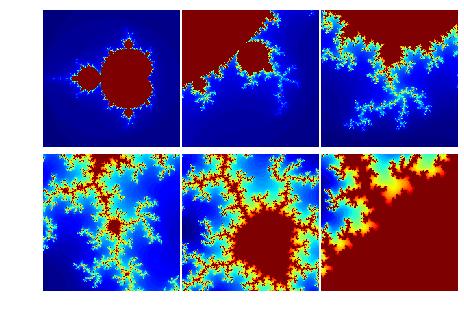

In [7]:
def iter_point(c):
    z = c
    for i in range(1, 100): # 最多迭代100次
        if abs(z)>2: break # 半径大于2则认为逃逸
        z = z*z+c
    return i # 返回迭代次数

def draw_mandelbrot(cx, cy, d):
    """
    绘制点(cx, cy)附近正负d的范围的Mandelbrot
    """
    x0, x1, y0, y1 = cx-d, cx+d, cy-d, cy+d 
    y, x = np.ogrid[y0:y1:200j, x0:x1:200j]
    c = x + y*1j
    start = time.clock()
    mandelbrot = np.frompyfunc(iter_point,1,1)(c).astype(np.float)
    print("time=",time.clock() - start)
    pl.imshow(mandelbrot, cmap=cm.jet, extent=[x0,x1,y0,y1])
    pl.gca().set_axis_off()

x,y = 0.27322626, 0.595153338

plt.subplot(231)
draw_mandelbrot(-0.5,0,1.5)
for i in range(2,7):    
    plt.subplot(230+i)
    draw_mandelbrot(x, y, 0.2**(i-1))
plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)
plt.show()

## 分形树叶

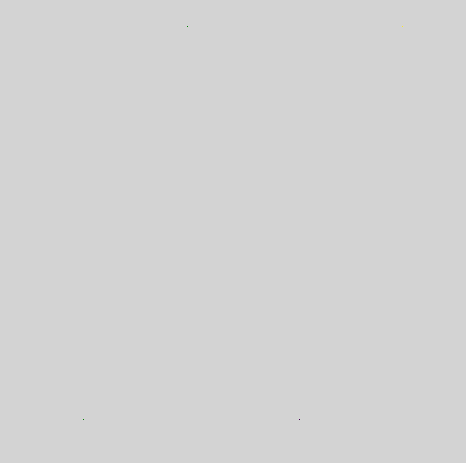

In [10]:
# 蕨类植物叶子的迭代函数和其概率值
eq1 = np.array([[0,0,0],[0,0.16,0]])
p1 = 0.01

eq2 = np.array([[0.2,-0.26,0],[0.23,0.22,1.6]])
p2 = 0.07

eq3 = np.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]])
p3 = 0.07

eq4 = np.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])
p4 = 0.85

def ifs(p, eq, init, n):
    """
    进行函数迭代
    p: 每个函数的选择概率列表
    eq: 迭代函数列表
    init: 迭代初始点
    n: 迭代次数

    返回值： 每次迭代所得的X坐标数组， Y坐标数组， 计算所用的函数下标    
    """

    # 迭代向量的初始化
    pos = np.ones(3, dtype=np.float)
    pos[:2] = init

    # 通过函数概率，计算函数的选择序列
    p = np.add.accumulate(p)    
    rands = np.random.rand(n)
    select = np.ones(n, dtype=np.int)*(n-1)
    for i, x in enumerate(p[::-1]):
        select[rands<x] = len(p)-i-1

    # 结果的初始化
    result = np.zeros((n,2), dtype=np.float)
    c = np.zeros(n, dtype=np.float)

    for i in range(n):
        eqidx = select[i] # 所选的函数下标
        tmp = np.dot(eq[eqidx], pos) # 进行迭代
        pos[:2] = tmp # 更新迭代向量

    # 保存结果
    result[i] = tmp
    c[i] = eqidx

    return result[:,0], result[:, 1], c

start = time.clock()
x, y, c = ifs([p1,p2,p3,p4],[eq1,eq2,eq3,eq4], [0,0], 100000)
time.clock() - start
plt.figure(figsize=(6,6))
plt.subplot(121)
plt.scatter(x, y, s=1, c="g", marker="s", linewidths=0)
plt.axis("equal")
plt.axis("off")
plt.subplot(122)
plt.scatter(x, y, s=1,c = c, marker="s", linewidths=0)
plt.axis("equal")
plt.axis("off")
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)
plt.gcf().patch.set_facecolor("#D3D3D3")
plt.show()